# Lesson 5 Assignment - Hypothesis Simulation

## Author - Lawrence Huang



## Instructions
Use the <a href="https://archive.ics.uci.edu/ml/datasets/Automobile">automotive data set</a> to perform the following:

1. Identify a likely distribution for price and several other features.
2. Compute basic summary statistics by both classical, bootstrap, and Bayesian methods
3. Compute confidence intervals for these summary statistics by classical, bootstrap, and Bayesian methods
4. Correctly use hypothesis tests to determine if the differences in pairs and multiple populations are significant:
            Classical tests
            Tukey’s Honest Significant Differences (HSD)
            Bootstrap methods
            Bayesian model


### Note
Please clearly outline the results with markdown text. Be sure your discussion includes narrative for your figures and tables so it is clear to the reader the importance of each bit of evidence.

[Preprocessing](#Preprocessing)<br>
[1. Identify a likely distribution for price and several other features](#Q1)<br>
[2. Compute basic summary statistics by both classical, bootstrap, and Bayesian methods](#Q2,Q3)<br>
[3. Compute confidence intervals for these summary statistics by classical, bootstrap, and Bayesian methods](#Q2,Q3)<br>
[4. Correctly use hypothesis tests to determine if the differences in pairs and multiple populations are significant](#Q4)

#### Preprocessing
<b>From the problem description, the task is to impress the client with other revelations, possibliy regarding insurance risk rating (symboling) and losses compared to other cars (normalized-losses).</b>

In [1]:
# Cleaned up Dataset location
fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/Automobile%20price%20data%20_Raw_.csv"

# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
import numpy.random as nr
import matplotlib.pyplot as plt
import scipy.stats as ss
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.stats.weightstats as ws

# Load data
auto = pd.read_csv(fileName)
print('dataframe shape:')
print(auto.shape)
auto.head()

dataframe shape:
(205, 26)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [2]:
# making a list of missing value types
missing_values = ['?']
auto = pd.read_csv(fileName, na_values=missing_values)

# total missing values for each feature
print('# of missing values:')
print(auto.isnull().sum())

# Drop rows with missing data
auto.dropna(axis=0, inplace=True)

print('\n')
print('dataframe shape:')
print(auto.shape)
auto.head()

# of missing values:
symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


dataframe shape:
(159, 26)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115.0,5500.0,18,22,17450.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110.0,5500.0,19,25,17710.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140.0,5500.0,17,20,23875.0
10,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.8,8.8,101.0,5800.0,23,29,16430.0


#### Q1
<b>Identify a likely distribution for price and several other features.</b><br>
Features to explore: 1. price, 2. wheel-base, 3. length, 4. highway-mpg<br>
Method: Kolmogorov-Smirnov test

In [3]:
# plot CDF of the sample and the CDF of the theoretical distribution
def plot_cums(dist1, dist2, label1, label2):
    ## sort the first data sample:
    data_sorted = np.sort(dist1)
    # calculate the proportional values of samples
    p = 1. * np.arange(len(dist1)) / (len(dist1) - 1)

    # Now plot as line and scatter plot. 
    plt.plot(data_sorted, p)
    plt.scatter(data_sorted, p, color = 'red', label=label1)
    
    # sort the seond data sample:
    data_sorted = np.sort(dist2)
    
    # And the second plot
    plt.plot(data_sorted, p, color = 'yellow')
    plt.scatter(data_sorted, p, color = 'green', label=label2)
    plt.title(label2)
    plt.legend()
    plt.show()
    
# plot feature histogram
def plot_col(col):
    auto[col].hist()
    plt.title('Histogram of {}'.format(col))
    plt.ylabel('Frequency')
    plt.xlabel(col)
    plt.grid(b=None)
    plt.show()

In [4]:
# standardize samples before applying the K-S test  
price_s = scale(auto['price'])
wheel_base_s = scale(auto['wheel-base'])
length_s = scale(auto['length'])
highway_mpg_s = scale(auto['highway-mpg'])

<b>feature 1: price</b>

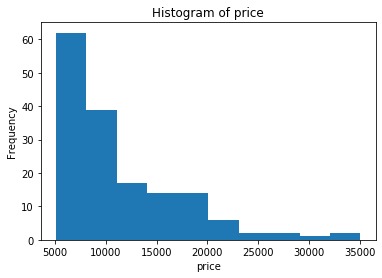

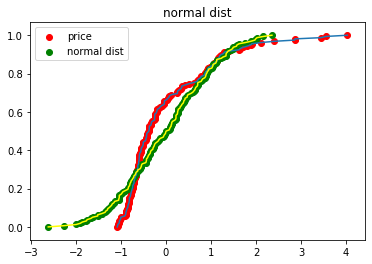

KS-statistic = 0.19085855605578028
P-value = 1.5137283208020269e-05


In [5]:
# plot feature histogram
plot_col('price')

# test against normal distribution
# fit sample to norm dist
args = ss.norm.fit(price_s) 

# graphical
plot_cums(price_s, scale(ss.norm.rvs(args[0], args[1], size = len(price_s), random_state=123)), 'price', 'normal dist')

# formal test
ks_statisic, pvalue = ss.kstest(rvs=price_s, cdf='norm', args=args)
print('KS-statistic = ' + str(ks_statisic))
print('P-value = ' + str(pvalue))

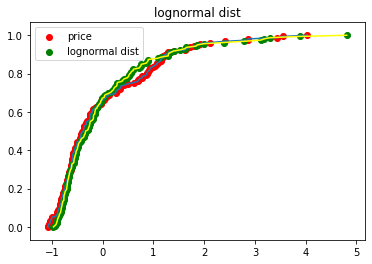

KS-statistic = 0.07418481111368125
P-value = 0.33083761053095684


In [6]:
# test against lognormal distribution, since log_price calculated in previous assignment was close to a normal distribution.
# fit sample to lognorm dist
args = ss.lognorm.fit(price_s) 

# graphical
plot_cums(price_s, scale(ss.lognorm.rvs(args[0], args[1], size = len(price_s), random_state=123)), 'price', 'lognormal dist')

# formal test
ks_statisic, pvalue = ss.kstest(rvs=price_s, cdf='lognorm', args=args)
print('KS-statistic = ' + str(ks_statisic))
print('P-value = ' + str(pvalue))

These results suggest that price is not normally distributed; a likely distribution is lognormal.

<b>feature 2: wheel-base</b>

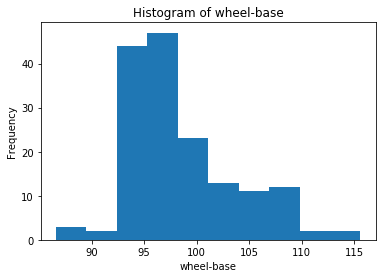

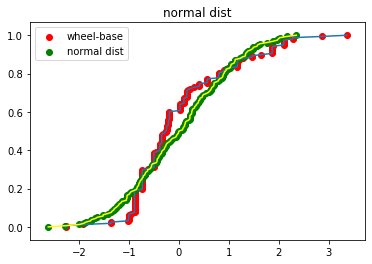

KS-statistic = 0.17801082210796998
P-value = 7.040779879846302e-05


In [7]:
# plot feature histogram
plot_col('wheel-base')

# test against normal distribution
# fit sample to norm dist
args = ss.norm.fit(wheel_base_s) 

# graphical
plot_cums(wheel_base_s, scale(ss.norm.rvs(args[0], args[1], size = len(wheel_base_s), random_state=123)), 'wheel-base', 'normal dist')

# formal test
ks_statisic, pvalue = ss.kstest(rvs=wheel_base_s, cdf='norm', args=args)
print('KS-statistic = ' + str(ks_statisic))
print('P-value = ' + str(pvalue))

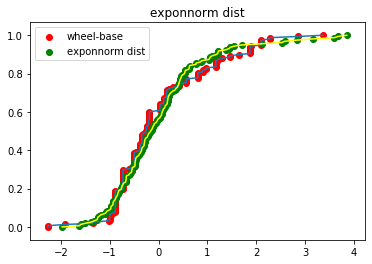

KS-statistic = 0.09803980560279169
P-value = 0.08793271516856202


In [8]:
# test against expnnorm distribution
args = ss.exponnorm.fit(wheel_base_s) 

# graphical
plot_cums(wheel_base_s, scale(ss.exponnorm.rvs(args[0], args[1], args[2], size=len(wheel_base_s), random_state=123)), 'wheel-base', 'exponnorm dist')

# formal test
ks_statisic, pvalue = ss.kstest(rvs=wheel_base_s, cdf='exponnorm', args=args)
print('KS-statistic = ' + str(ks_statisic))
print('P-value = ' + str(pvalue))

These results suggest that wheel-base is not normally distributed; a likely distribution is exponentially modified normal.

<b>feature 3: length</b>

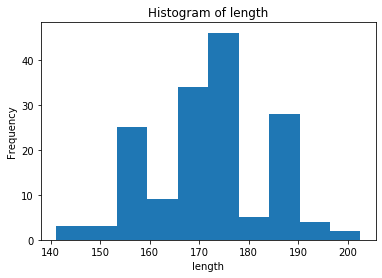

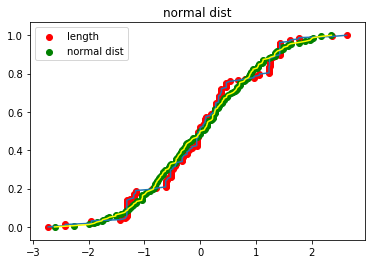

KS-statistic = 0.09284038458217014
P-value = 0.12108738511593291


In [9]:
# plot feature histogram
plot_col('length')

# test against normal distribution
# fit sample to norm dist
args = ss.norm.fit(length_s) 

# graphical
plot_cums(length_s, scale(ss.norm.rvs(args[0], args[1], size = len(length_s), random_state=123)), 'length', 'normal dist')

# formal test
ks_statisic, pvalue = ss.kstest(rvs=length_s, cdf='norm', args=args)
print('KS-statistic = ' + str(ks_statisic))
print('P-value = ' + str(pvalue))

These results suggest that a likely distribution for length is normal distribution.

<b>feature 4: highway-mpg</b>

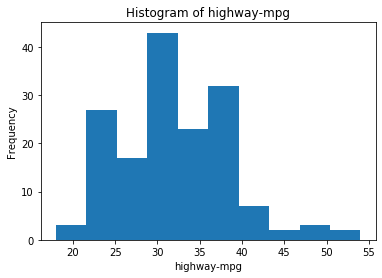

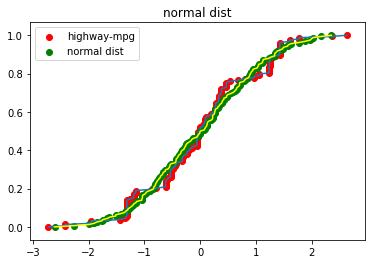

KS-statistic = 0.09357522064902901
P-value = 0.11585620251062947


In [10]:
# plot feature histogram
plot_col('highway-mpg')

# test against normal distribution
# fit sample to norm dist
args = ss.norm.fit(highway_mpg_s) 

# graphical
plot_cums(length_s, scale(ss.norm.rvs(args[0], args[1], size = len(length_s), random_state=123)), 'highway-mpg', 'normal dist')

# formal test
ks_statisic, pvalue = ss.kstest(rvs=highway_mpg_s, cdf='norm', args=args)
print('KS-statistic = ' + str(ks_statisic))
print('P-value = ' + str(pvalue))

These results suggest that a likely distribution for highway-mpg is normal distribution.

#### Q2,Q3
<b>Q2: Compute basic summary statistics by both classical, bootstrap, and Bayesian methods</b><br>
<b>Q3: Compute confidence intervals for these summary statistics by classical, bootstrap, and Bayesian methods</b>

<b>Classical method</b>

In [11]:
# quick look at summary statistics
cols = ['price', 'wheel-base', 'length', 'highway-mpg']
auto[cols].describe()

,price,wheel-base,length,highway-mpg
count,159.000000,159.000000,159.000000,159.000000
mean,11445.729560,98.264151,172.413836,32.081761
std,5877.856195,5.167416,11.523177,6.459189
min,5118.000000,86.600000,141.100000,18.000000
25%,7372.000000,94.500000,165.650000,28.000000
50%,9233.000000,96.900000,172.400000,32.000000
75%,14719.500000,100.800000,177.800000,37.000000
max,35056.000000,115.600000,202.600000,54.000000


In [12]:
# 95% confidence interval
# Assuming the data is being considered a population, and with sample size > 30, use z-score
price_classical_ci = ws.DescrStatsW(auto['price']).zconfint_mean(alpha=0.05, alternative='two-sided')
wheel_classical_ci = ws.DescrStatsW(auto['wheel-base']).zconfint_mean(alpha=0.05, alternative='two-sided')
length_classical_ci = ws.DescrStatsW(auto['length']).zconfint_mean(alpha=0.05, alternative='two-sided')
highway_classical_ci = ws.DescrStatsW(auto['highway-mpg']).zconfint_mean(alpha=0.05, alternative='two-sided')

In [13]:
# mean, standard deviation, 95% confidence interval
pd.DataFrame({'mean':np.mean(auto[cols]), 'standard deviation':np.std(auto[cols]),
             '95% conf int for mean':[price_classical_ci, wheel_classical_ci, length_classical_ci, highway_classical_ci]})

,mean,standard deviation,95% conf int for mean
price,11445.729560,5859.343216,"(10532.10348560652, 12359.355633890336)"
wheel-base,98.264151,5.151141,"(97.46095232778192, 99.06734955901054)"
length,172.413836,11.486883,"(170.6227285500121, 174.20494440596272)"
highway-mpg,32.081761,6.438845,"(31.077775338981798, 33.085746673596816)"


<b>Bootstrap method: bootstrap the means using 1000 bootstrap samples</b><br>
(since the CLT only applies to sample means and not medians or any other statistic)

In [14]:
# bootstrap the mean
def bootstrap_mean(col, n_replicas=1000):
    return pd.Series([auto[col].sample(frac=1, replace=True).mean()
    for i in range(n_replicas)])

price_bootstrap_means = bootstrap_mean('price')
wheel_bootstrap_means = bootstrap_mean('wheel-base')
length_bootstrap_means = bootstrap_mean('length')
highway_bootstrap_means = bootstrap_mean('highway-mpg')

pd.DataFrame({'mean':[np.mean(price_bootstrap_means), np.mean(wheel_bootstrap_means), 
          np.mean(length_bootstrap_means), np.mean(highway_bootstrap_means)],
 'standard error':[np.std(price_bootstrap_means), np.std(wheel_bootstrap_means),
             np.std(length_bootstrap_means), np.std(highway_bootstrap_means)],
              '95% conf int for mean': [(np.percentile(np.sort(price_bootstrap_means), 5/2), np.percentile(np.sort(price_bootstrap_means), 100-5/2)),
             (np.percentile(np.sort(wheel_bootstrap_means), 5/2), np.percentile(np.sort(wheel_bootstrap_means), 100-5/2)),
             (np.percentile(np.sort(length_bootstrap_means), 5/2), np.percentile(np.sort(length_bootstrap_means), 100-5/2)),
             (np.percentile(np.sort(highway_bootstrap_means), 5/2), np.percentile(np.sort(highway_bootstrap_means), 100-5/2))]},
             index=['price', 'wheel-base', 'length', 'highway-mpg'])

,mean,standard error,95% conf int for mean
price,11420.744943,459.453138,"(10535.89858490566, 12363.622327044026)"
wheel-base,98.260721,0.405108,"(97.45279874213837, 99.0831132075472)"
length,172.437967,0.897452,"(170.64537735849044, 174.1551257861634)"
highway-mpg,32.082899,0.505104,"(31.087893081761006, 33.06949685534591)"


<b>Bayesian method</b>

In [15]:
# Bayesian confidence intervals for the mean, var, and std using bayes_mvs
price_bayesian_ci = ss.bayes_mvs(auto['price'], alpha=0.95)
wheel_bayesian_ci = ss.bayes_mvs(auto['wheel-base'], alpha=0.95)
length_bayesian_ci = ss.bayes_mvs(auto['length'], alpha=0.95)
highway_bayesian_ci = ss.bayes_mvs(auto['highway-mpg'], alpha=0.95)

In [16]:
pd.DataFrame({'mean':[price_bayesian_ci[0][0], wheel_bayesian_ci[0][0], length_bayesian_ci[0][0], highway_bayesian_ci[0][0]],
             'standard deviation':[price_bayesian_ci[2][0], wheel_bayesian_ci[2][0], length_bayesian_ci[2][0], highway_bayesian_ci[2][0]],
             '95% Bayesian conf int/credible interval for mean':[price_bayesian_ci[0][1], wheel_bayesian_ci[0][1], length_bayesian_ci[0][1], highway_bayesian_ci[0][1]]},
            index=['price', 'wheel-base', 'length', 'highway-mpg'])

,mean,standard deviation,95% Bayesian conf int/credible interval for mean
price,11445.729560,5905.942589,"(10525.051613272095, 12366.407506224761)"
wheel-base,98.264151,5.192108,"(97.4547527957668, 99.07354909102567)"
length,172.413836,11.578239,"(170.60890378646522, 174.21876916950956)"
highway-mpg,32.081761,6.490053,"(31.07002602123373, 33.09349599134488)"


#### Q4
<b>Correctly use hypothesis tests to determine if the differences in pairs and multiple populations are significant:
    <li>Classical tests</li>
    <li>Tukey’s Honest Significant Differences (HSD)</li>
    <li>Bootstrap methods</li>
    <li>Bayesian model</li></b>
    
Following the assignment prompt (insurance risk rating is of interest), will compare pairs/multiple populations of <b>price</b> conditioned by <b>symboling</b>. The same analysis could be replicated for other features.<br>
Symboling is preferred over normalized-losses because the latter is not categorical, as shown in the plot below.

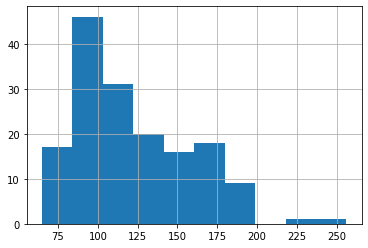

In [17]:
auto['normalized-losses'].hist()

In [18]:
# plot boxplot to graphically explore the differences 
# between the feature (col) conditioned by symboling
def make_boxplot_symboling(col, nobs=10, figsz=(6,4)):
    import seaborn as sns
    print('breakdown:')
    print(auto['symboling'].value_counts())

    subset = auto['symboling'].value_counts()[auto['symboling'].value_counts()>=nobs].index
    auto_plot = auto[auto['symboling'].isin(subset)]

    fig, ax = plt.subplots(figsize=figsz)
    sns.boxplot(x='symboling', y=col, data=auto_plot, ax=ax)
    plt.title('{} conditioned by symboling'.format(col))
    plt.show()

<b>Determine whether multiple populations of price conditioned by symboling are significant by ANOVA and Tukey's HSD</b><br>
Here, to make sure there is sufficient data for each category, symboling categories with less than 10 observations were dropped.

breakdown:
 0    48
 1    46
 2    29
-1    20
 3    13
-2     3
Name: symboling, dtype: int64


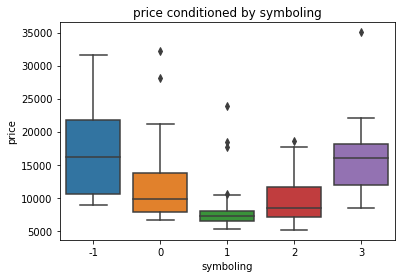

F statistic = 13.79133797348645
P-value = 1.3057369093144778e-09


     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj     lower      upper    reject
-------------------------------------------------------------
    -1      0 -4699.8208 0.0063  -8455.8888  -943.7529   True
    -1      1 -8495.6587  0.001 -12275.6661 -4715.6513   True
    -1      2 -6660.0155  0.001 -10762.0437 -2557.9873   True
    -1      3  -184.7423    0.9  -5212.6222  4843.1376  False
     0      1 -3795.8379 0.0039  -6707.7549  -883.9209   True
     0      2 -1960.1947 0.4809  -5279.4476  1359.0582  False
     0      3  4515.0785 0.0421    102.5531   8927.604   True
     1      2  1835.6432 0.5474  -1510.6756   5181.962  False
     1      3  8310.9164  0.001   3877.9952 12743.8376   True
     2      3  6475.2732  0.002   1764.7563 11185.7901   True
-------------------------------------------------------------


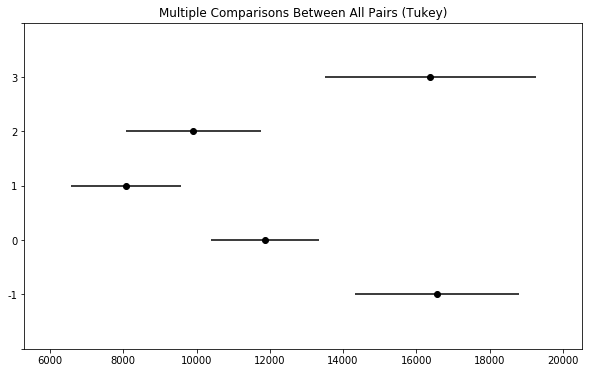

In [19]:
# price
make_boxplot_symboling('price')

# price conditioned by symboling
sm1 = auto.groupby('symboling').get_group(-1)['price']
s0 = auto.groupby('symboling').get_group(0)['price']
s1 = auto.groupby('symboling').get_group(1)['price']
s2 = auto.groupby('symboling').get_group(2)['price']
s3 = auto.groupby('symboling').get_group(3)['price']

# ANOVA
f_statistic, p_value = ss.f_oneway(sm1, s0, s1, s2, s3)
print('F statistic = ' + str(f_statistic))
print('P-value = ' + str(p_value))

print('\n')
# Tukey's HSD
df = pd.DataFrame({'vals': np.concatenate((sm1, s0, s1, s2, s3)).flatten(),
                   'group_num': ['-1']*len(sm1)+['0']*len(s0)+['1']*len(s1)+
                   ['2']*len(s2)+['3']*len(s3)})
Tukey_HSD = pairwise_tukeyhsd(df.vals, df.group_num)
print(Tukey_HSD)

Tukey_HSD.plot_simultaneous();

<b>Results:</b>
<br>
From ANOVA: the F statistic is large and the p-value is small. We can reject the null hypothesis that the variables have the same mean, as the probability of the differences arising from random chance is low.</li>
<p>
From Tukey's HSD test, the following pairs are statistically different at the 95% confidence level:
<ul><li>-1 and 0</li>
            <li>-1 and 1</li>
        <li>-1 and 2</li>
    <li>0 and 1</li>
    <li>0 and 3</li>
    <li>1 and 3</li>
    <li>2 and 3</li>
</ul>

<b>Determine whether difference in pairs of price conditioned by symboling are significant by Bootstrapping</b>

Group 1: symboling = 0<br>
Group 2: symboling = 1<br>
<b>Hypothesis test</b>: Does the confidence interval of the diffrence in means cover zero? Significantly different if (lower CI>0) or (upper CI<0), in which case we reject the null hypothesis that the two samples were drawn from the same population distribution.<br>

In [20]:
# bootstrap price for symboling = 0 and symboling = 1 groups
n_replicas = 1000
diffs = []
for i in range(n_replicas):
    sample = auto.sample(frac=1.0, replace=True)
    s0_sample_mean = sample[sample['symboling'] == 0]['price'].mean()
    s1_sample_mean = sample[sample['symboling'] == 1]['price'].mean()
    diffs.append(s0_sample_mean - s1_sample_mean)
diffs = pd.Series(diffs)

In [21]:
# Plot the distribution and mark the mean, 95% confidence interval
def plot_hist(x, p=5):
    plt.hist(x, alpha=0.5)
    plt.axvline(x.mean())
    # 95% confidence interval    
    plt.axvline(np.percentile(x, p/2.), color='red', linewidth=3)
    plt.axvline(np.percentile(x, 100-p/2.), color='red', linewidth=3)

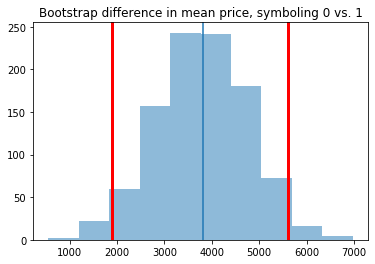

In [22]:
# plot difference in mean + 95% confidence interval
plot_hist(diffs)
plt.title('Bootstrap difference in mean price, symboling 0 vs. 1')
plt.show()

<b>Result</b>: The distribution of the difference in means does not cover zero. We can infer that the means of the two populations are significantly different.

Group 1: symboling = 1<br>
Group 2: symboling = 2<br>
<b>Hypothesis test</b>: Does the confidence interval of the diffrence in means cover zero? Significantly different if (lower CI>0) or (upper CI<0), in which case we reject the null hypothesis that the two samples were drawn from the same population distribution.<br>

In [23]:
# bootstrap price for symboling = 0 and symboling = 2 groups
n_replicas = 1000
diffs = []
for i in range(n_replicas):
    sample = auto.sample(frac=1.0, replace=True)
    s0_sample_mean = sample[sample['symboling'] == 0]['price'].mean()
    s2_sample_mean = sample[sample['symboling'] == 2]['price'].mean()
    diffs.append(s0_sample_mean - s2_sample_mean)
diffs = pd.Series(diffs)

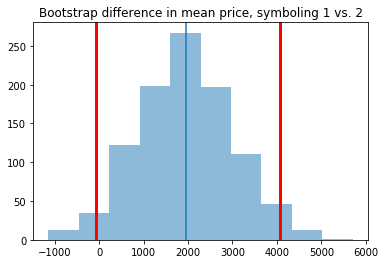

In [24]:
# plot difference in mean + 95% confidence interval
plot_hist(diffs)
plt.title('Bootstrap difference in mean price, symboling 1 vs. 2')
plt.show()

<b>Results</b>: The distribution of the difference in means covers zero. We can infer that the means of the two populations are not significantly different.

<b>Determine whether difference in pairs of price conditioned by symboling are significant by Bayesian method</b>

Group 1: symboling = 0<br>
Group 2: symboling = 1<br>
<b>Hypothesis test</b>: Reject null hypothesis that the 2 samples were drawn from the same population distribution if the 95% credible intervals do not overlap.

In [25]:
# Bayesian confidence intervals for the mean, var, and std using bayes_mvs
s0 = auto.groupby('symboling').get_group(0)['price']
s1 = auto.groupby('symboling').get_group(1)['price']
s2 = auto.groupby('symboling').get_group(2)['price']

s0_bayesian_ci = ss.bayes_mvs(s0, alpha=0.95)
s1_bayesian_ci = ss.bayes_mvs(s1, alpha=0.95)
s2_bayesian_ci = ss.bayes_mvs(s2, alpha=0.95)

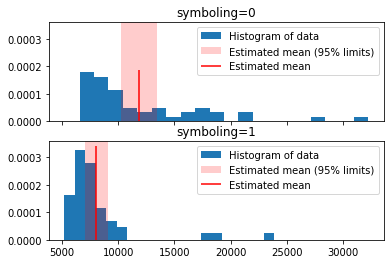

In [26]:
# Plot means and credible intervals
fig, axs = plt.subplots(2,1, sharex=True, sharey=True)
axs[0].hist(s0, bins=20, density=True, label='Histogram of data')
axs[0].vlines(s0_bayesian_ci[0].statistic, axs[0].get_ylim()[0], axs[0].get_ylim()[1], colors='r', label='Estimated mean')
axs[0].axvspan(s0_bayesian_ci[0].minmax[0],s0_bayesian_ci[0].minmax[1], facecolor='r', 
           alpha=0.2, label=r'Estimated mean (95% limits)')
axs[0].legend()
axs[0].set_title('symboling=0')

axs[1].hist(s1, bins=20, density=True, label='Histogram of data')
axs[1].vlines(s1_bayesian_ci[0].statistic, axs[1].get_ylim()[0], axs[1].get_ylim()[1], colors='r', label='Estimated mean')
axs[1].axvspan(s1_bayesian_ci[0].minmax[0],s1_bayesian_ci[0].minmax[1], facecolor='r', 
           alpha=0.2, label=r'Estimated mean (95% limits)')
axs[1].legend()
axs[1].set_title('symboling=1')

plt.show()

<b>Results:</b> Reject null hypothesis that the 2 samples were drawn from the same population distribution as the 95% credible intervals do not overlap.

Group 1: symboling = 1<br>
Group 2: symboling = 2<br>
<b>Hypothesis test</b>: Reject null hypothesis that the 2 samples were drawn from the same population distribution if the 95% credible intervals do not overlap.

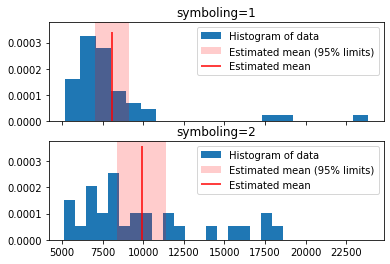

In [27]:
# Plot means and credible intervals
fig, axs = plt.subplots(2,1, sharex=True, sharey=True)
axs[0].hist(s1, bins=20, density=True, label='Histogram of data')
axs[0].vlines(s1_bayesian_ci[0].statistic, axs[0].get_ylim()[0], axs[0].get_ylim()[1], colors='r', label='Estimated mean')
axs[0].axvspan(s1_bayesian_ci[0].minmax[0],s1_bayesian_ci[0].minmax[1], facecolor='r', 
           alpha=0.2, label=r'Estimated mean (95% limits)')
axs[0].legend()
axs[0].set_title('symboling=1')

axs[1].hist(s2, bins=20, density=True, label='Histogram of data')
axs[1].vlines(s2_bayesian_ci[0].statistic, axs[1].get_ylim()[0], axs[1].get_ylim()[1], colors='r', label='Estimated mean')
axs[1].axvspan(s2_bayesian_ci[0].minmax[0],s2_bayesian_ci[0].minmax[1], facecolor='r', 
           alpha=0.2, label=r'Estimated mean (95% limits)')
axs[1].legend()
axs[1].set_title('symboling=2')

plt.show()

<b>Results</b>: Fail to reject null hypothesis that the 2 samples were drawn from the same population distribution as the 95% credible intervals overlap.